<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/185150400111054_Muhammad_Rizqi_Ramadhan_Analisa_Trending_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Projek Akhir Pengantar Data Saintis (PDS)**

Nama : Muhammad Rizqi Ramadhan

NIM. : 185150400111054

Kelas: SI - B

# **Deskripsi Tujuan Bisnis**

  Youtube adalah salah satu platform sharing video yang sangat populer. Pada Youtube terdapat ratusan juta video yang ditonton dan upload video terbaru tiap harinya. Dalam Youtube terdapat berbagai fitur seperti share, like, simpan playlist, dan list trending video.

  Tujuan dari projek ini untuk mengetahui insight penyebab dari video trending terbaik. Insight dapat mengacu pada ciri dari video trending dan waktu yang tepat ketika diupload. Dengan menlakukan analisa pada video youtube yang trending harapannya dapat diketahui pola terbaik video diupload.

# **Analisa Pendekatan yang Dilakukan**

Analisa pada projek ini menggunakan model deskriptif. Dimana hasil akhirnya berupa rangkuman data yang memberikan informasi. Data dapat dipresentasikan dalam bentuk tabel, grafik, nilai pemusatan dan nilai persebaran. Analisa ini dipilih sebab dapat mendukung tujuan dari proses bisnis, yaitu mengetahui pola atau ciri video yang paling trending di youtube.

# **Pengumpulan Data**

Sumber data yang digunakan (dataset) didapatkan dari website "kaggle.com". Website tersebut merupakan penyedia data dan dokumentassi dari analisa open source. Data pada website kaggle didownload lalu di upload ke projek file google collabs. File berada pada google drive public https://drive.google.com/file/d/1GH6ybwOSHd98Dpv9tHFf2OrO-KY_D14O/view?usp=sharing

# **Pemahaman Sumber Data**



Sumber data terdiri dari 16 kolom yang memiliki penjelasannya masing-masing sebagai berikut:

1. video_id                : id video
2. trending_date           : tanggal video trending
3. title                   : judul dari video
4. channel_title           : nama channel
5. category_id             : kategori dari video
6. publish_time            : waktu video dipublish
7. tags                    : tag yang digunakan video
8. views                   : jumlah penonton video
9. likes                   : jumlah suka pada video
10. dislikes               : jumlah tidak suka pada video
11. comment_count          : jumlah komentar video
12. thumbnail_link         : gambar yang digunakan video sebagai preview
13. comments_disabled      : status komentar video
14. ratings_disabled       : status rating video
15. video_error_or_removed : status akses video

Jumlah data pada dataset sebanyak 40949 baris dan masih belum mengalami cleansing dan transformasi.



In [ ]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
# Menyembunyikan error filter
warnings.filterwarnings('ignore')

# Konfigurasi umum
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# download file dari drive public (file didownload dan diupload ke drive public mandiri)
!gdown --id "1GH6ybwOSHd98Dpv9tHFf2OrO-KY_D14O"

Downloading...
From: https://drive.google.com/uc?id=1GH6ybwOSHd98Dpv9tHFf2OrO-KY_D14O
To: /content/USvideos.csv
62.8MB [00:00, 87.6MB/s]


In [ ]:
# import file csv
df = pd.read_csv("/content/USvideos.csv")

In [ ]:
# Melihat kolom file import
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# menjelaskan terkait informasi dataset (jumlah data, nama tipe dan jumlah kolom)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# **Persiapan (Eksplorasi) Data**

Mencakup cleansing data seperti proses invalid value, missing value, remove duplicate data, formatting data. Pada proses ini juga dilakukan transformasi data sebagai persiapan sebelum data dimodelkan. Pembentukan kolom baru dan penghapusan kolom yang sudah ada juga dimungkinkan untuk mengakomodasi kebutuhan infomrasi/data.

Pada info dataset di kolom description terdapat jumlah data yang tidak sinkron. Sehingga perlu dilakukan cleansing pada kolom tersebut.

In [ ]:
# replace null description menjadi NaN
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


In [ ]:
# merubah NaN value menjadi string kosong
df["description"] = df["description"].fillna(value="")

# **Pemodelan Data**

Melakukan analisis terhadap data set yang sudah dipersiapkan. Analisa yang digunakan harus mengacu pada tujuan bisnis, sebab proses ini merupakan pembahasan terkait bagaimana cara menjawab pertanyaan tujuan. Dalam 

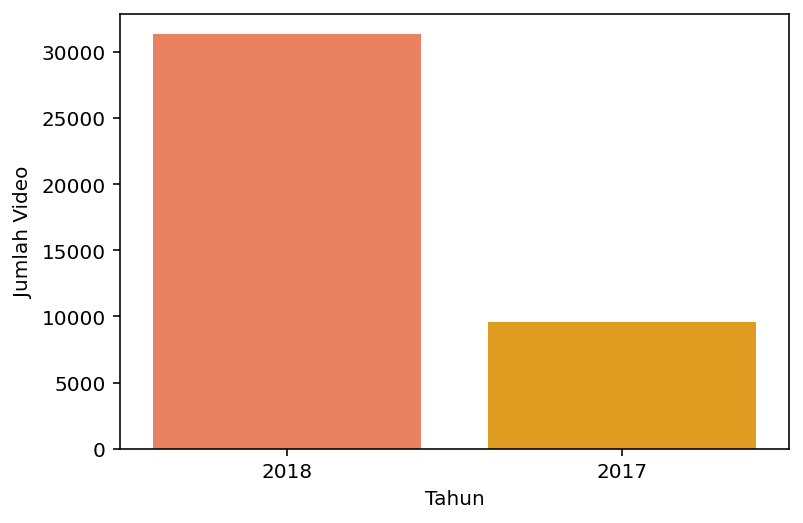

In [ ]:
# Mencari tahun data video yang dianalisa
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Tahun", ylabel="Jumlah Video")

In [ ]:
# Presentasi pembagian dataset
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018    0.765562
2017    0.234438
Name: trending_date, dtype: float64

In [ ]:
# Menghitung jumlah 10 character & kata pada judul video yang paling sering digunakan
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(10)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024)]

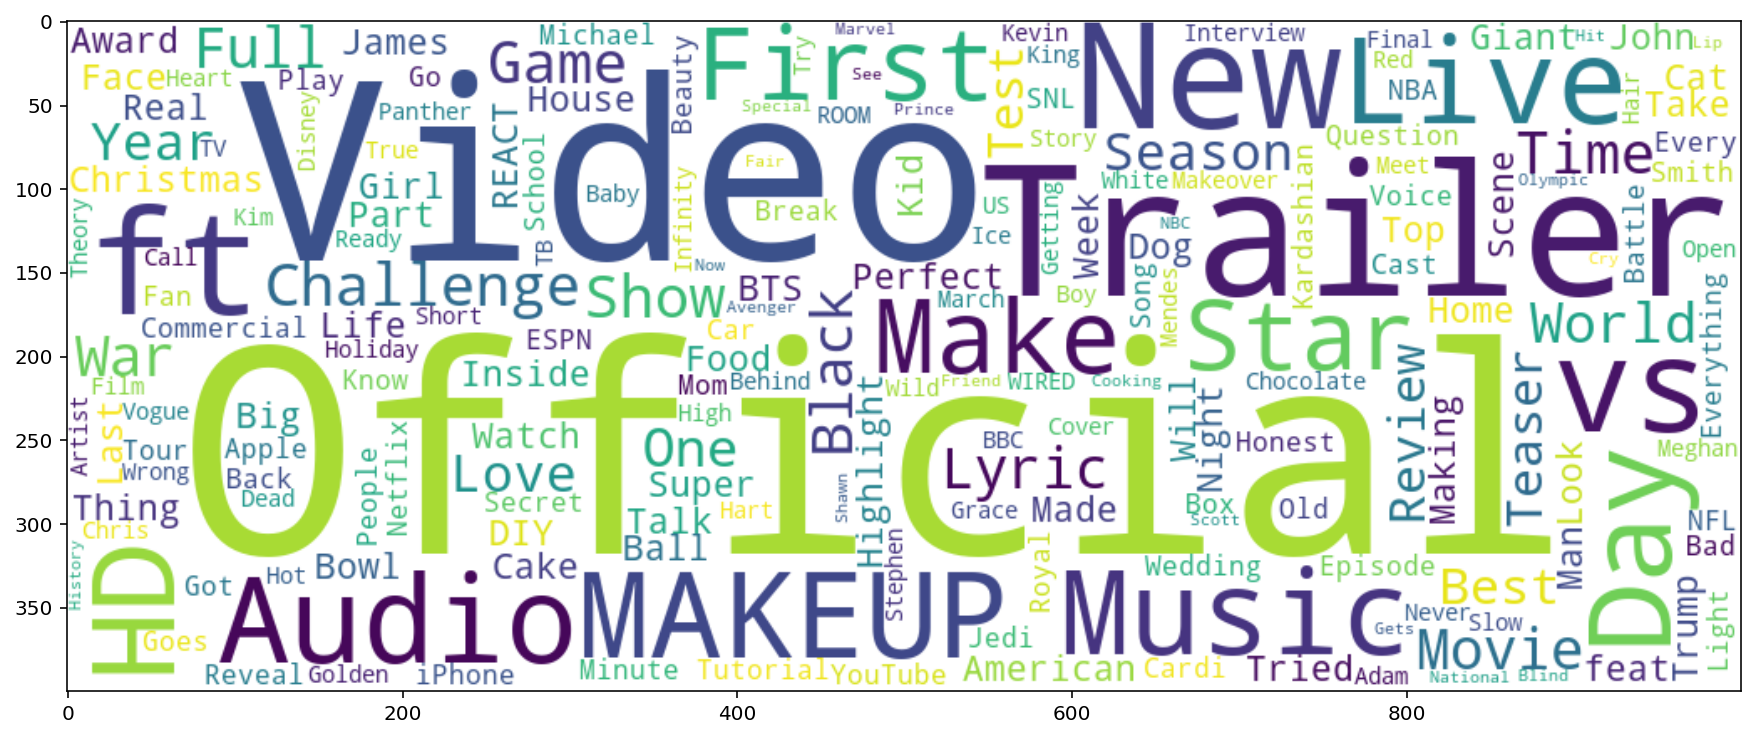

In [ ]:
# Generate wordCloud (kata yang sering muncul)
wc = wordcloud.WordCloud(width=1000, height=400, 
                         collocations=False, background_color="white").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')

In [ ]:
# Merubah kolom publish time menjadi publishing_day dan publishing_hour
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

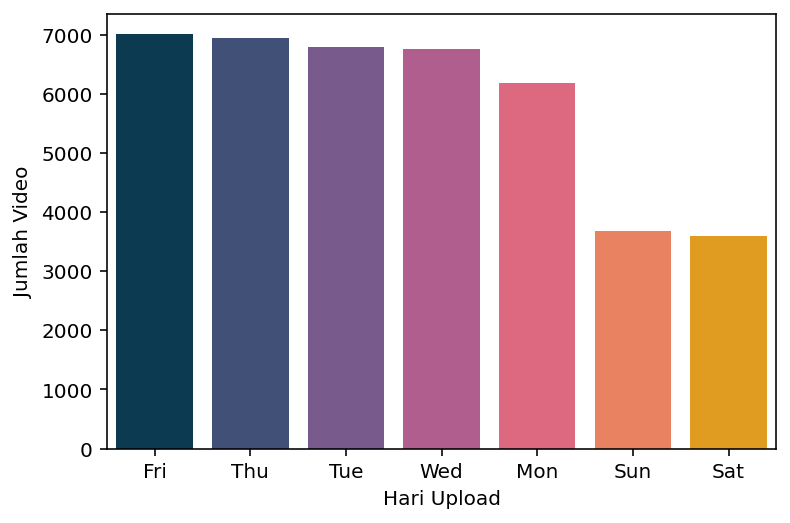

In [ ]:
# Statistik statisktik hari video trending diupload
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Hari Upload", ylabel="Jumlah Video")

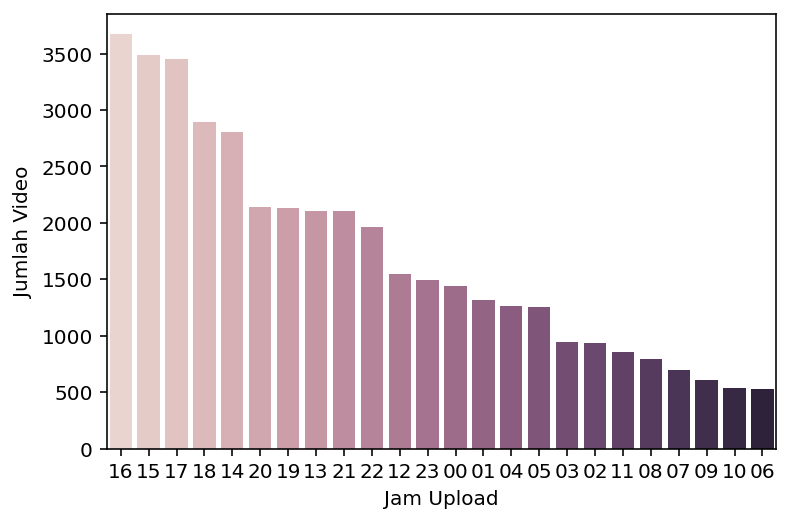

In [ ]:
# Statistik jam video trending diupload
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Jam Upload", ylabel="Jumlah Video")

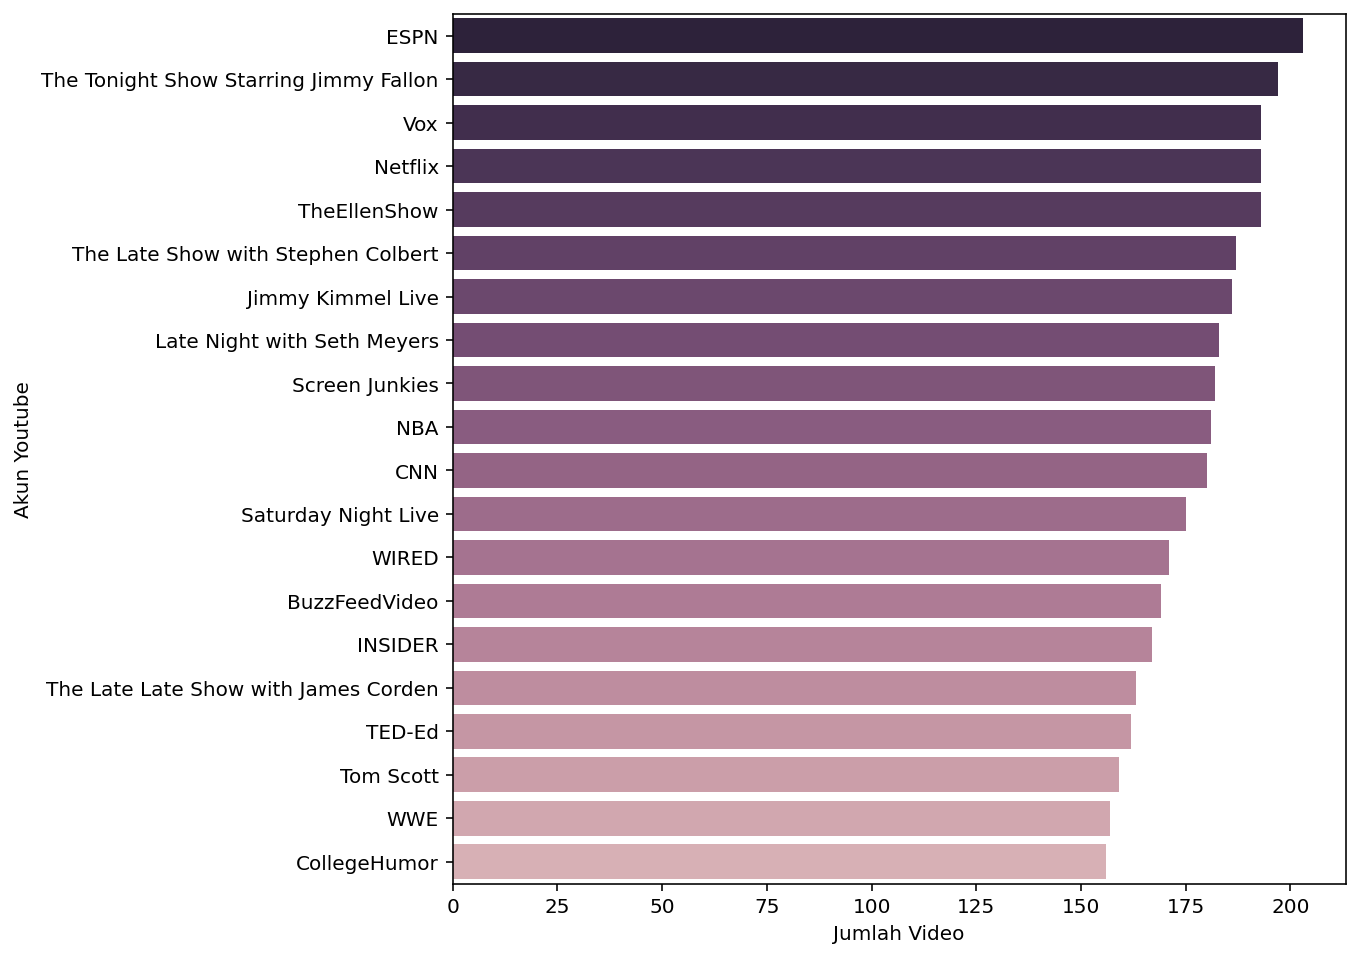

In [ ]:
# Statistik akun youtube yang memiliki video trending terbanyak
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=24, reverse=True), ax=ax)
_ = ax.set(xlabel="Jumlah Video", ylabel="Akun Youtube")

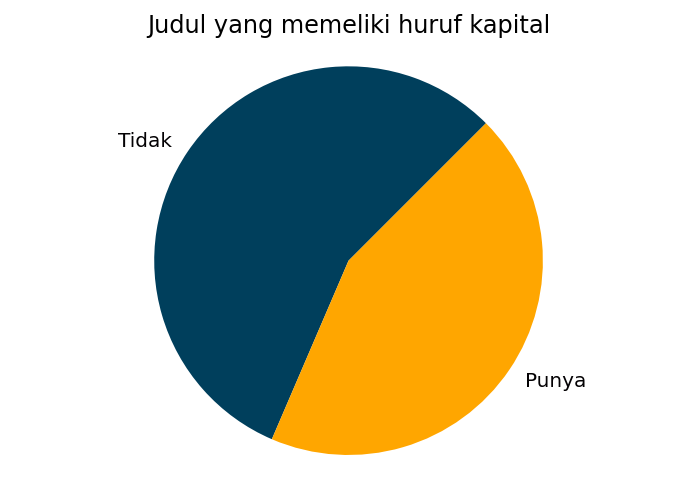

In [ ]:
# Statistik video yang memiliki huruf kapital
def capitalWords(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(capitalWords)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['Tidak', 'Punya'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Judul yang memeliki huruf kapital')


In [ ]:
# Presentase video yang meimiliki huruf kapital
df["contains_capitalized"].value_counts(normalize=True)

False    0.560429
True     0.439571
Name: contains_capitalized, dtype: float64

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


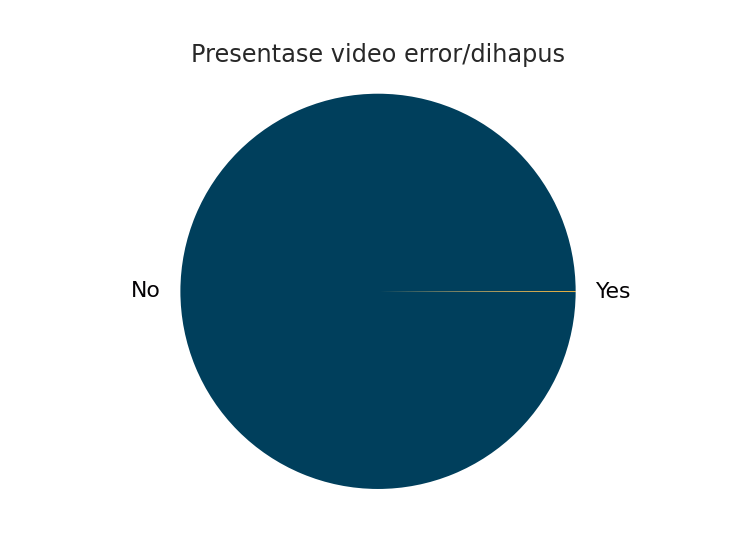

In [ ]:
# Statistik video trending mengalami error atau dihapus
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Presentase video error/dihapus')

In [ ]:
# Total video trending mengalami error atau dihapus
df["video_error_or_removed"].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

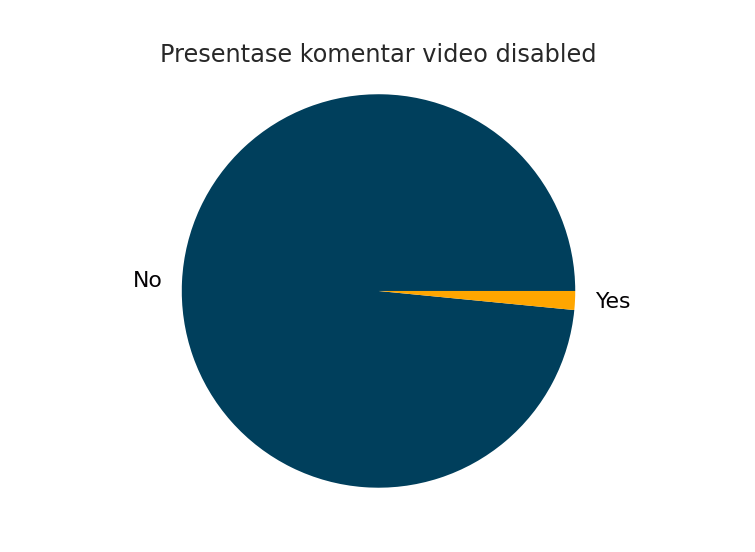

In [ ]:
# Statistik video trending setting komentar disabled
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Presentase komentar video disabled')

In [ ]:
# Total video trending setting komentar disabled
df["comments_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

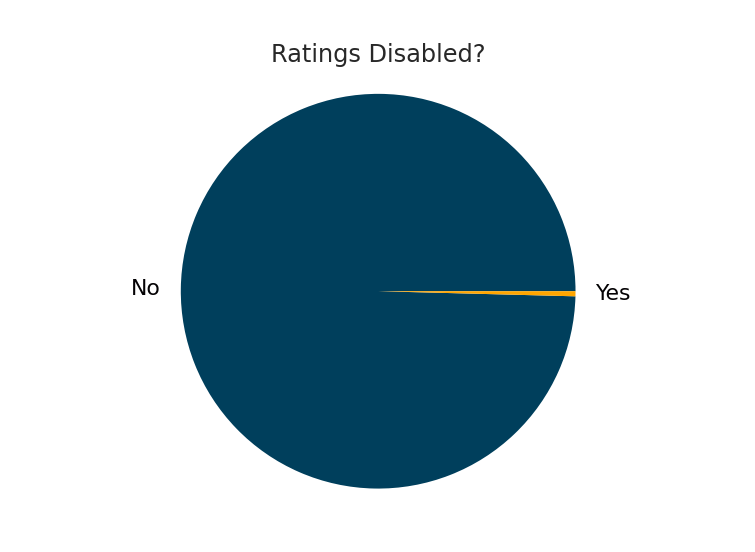

In [ ]:
# Statistik video trending setting rating disabled
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [ ]:
# Total video trending setting rating disabled
df["ratings_disabled"].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

In [ ]:
# Total video trending yang memiliki setting rating dan komentar disabled
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

106

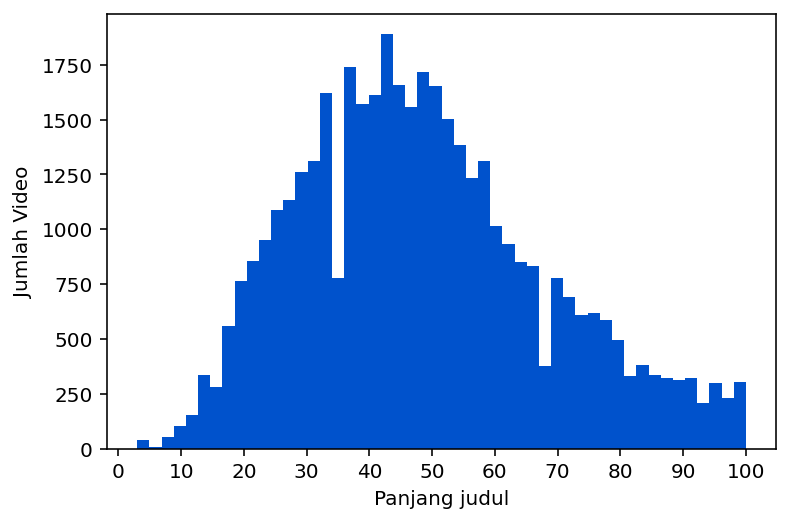

In [ ]:
# Statistik panjang judul video trending
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color="#0052CC", hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Panjang judul", ylabel="Jumlah Video", xticks=range(0, 110, 10))

In [ ]:
# Korelasi antar colom yang bertipe data integer
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00


Dari tabel di atas terdapat kolom/variabelnya yang memiliki korelasi yang kuat. Korelasi yang kuat seperti hubungan antara komentar dan likes.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


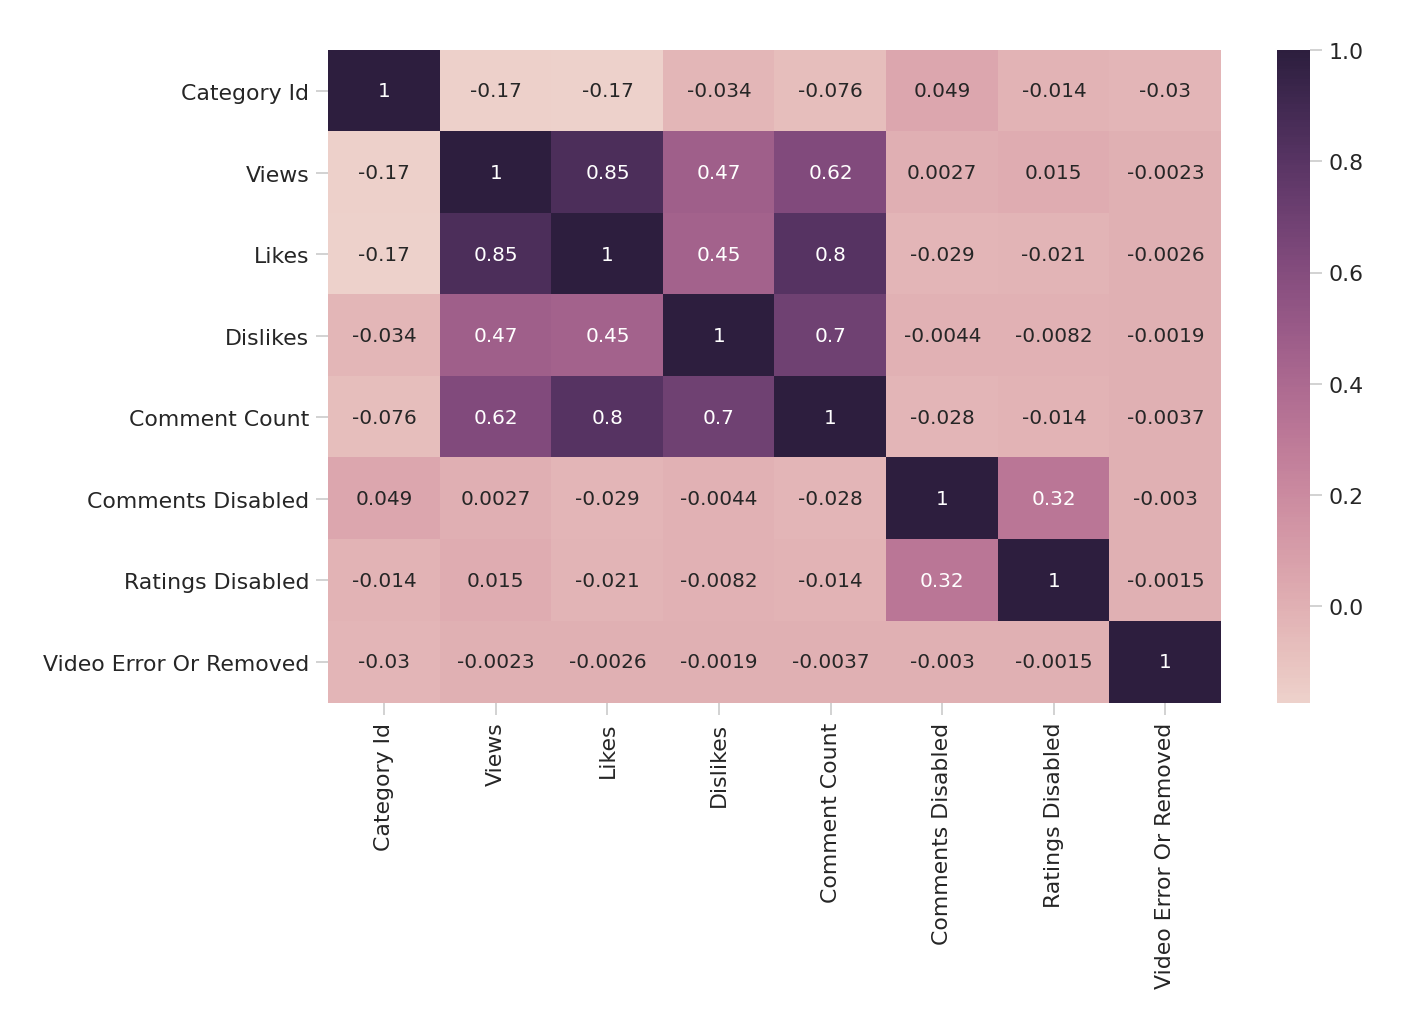

In [ ]:
# Korelasi tabel antar variabel menggunakan heatmap
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

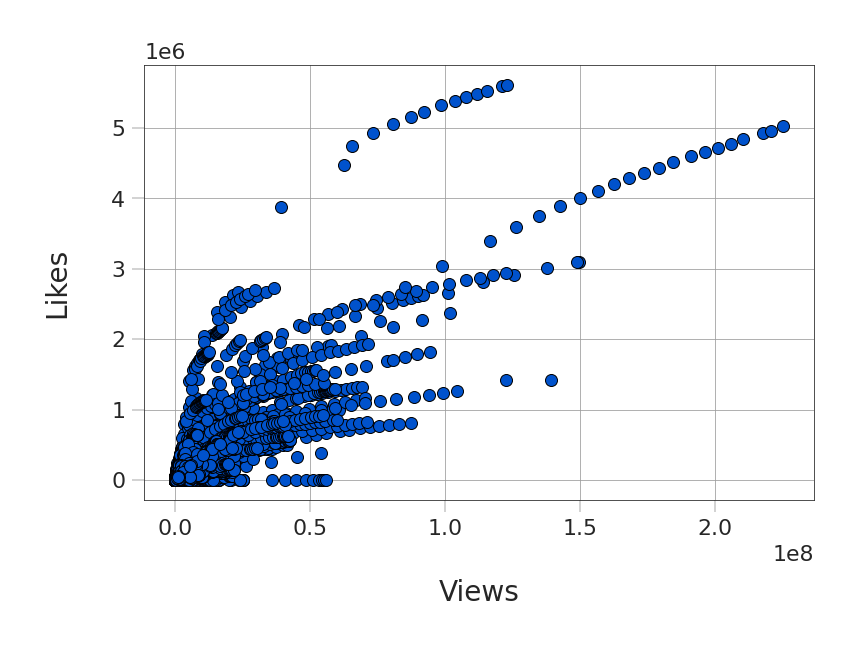

In [ ]:
# Korelasi tabel antar variabel views dan likes plotting scatter
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color="#0052CC", edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

Korelasi antara jumlah views dan likes cukup kuat karena hampir tegak lurus

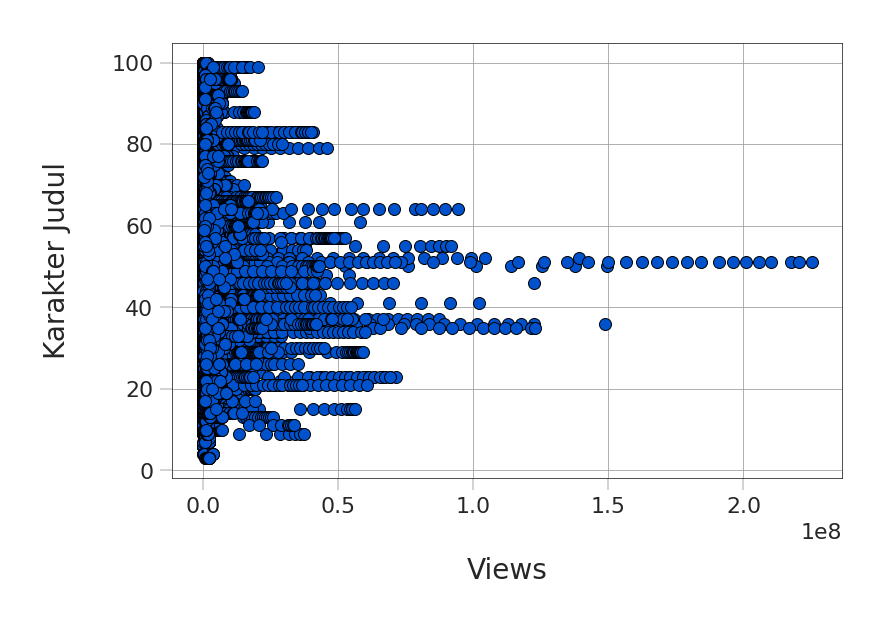

In [ ]:
# Korelasi tabel antar variabel jumlah judul dan views plotting scatter
df["title_length"] = df["title"].apply(lambda x: len(x))
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color="#0052CC", edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Karakter Judul")

Tidak terdapat korelasi pada variable jumlah karakter judul dan views

# **Evaluasi Model**

Merupakan summary dari proses analisa

* Dataset yang digunakan memiliki 40949 baris.  
* Dataset yang digunakan merupakan data dari tahun 2017 and 2018 dengan presentase perbadingan 77% dari tahun 2018 dan 23% dari tahun 2017.
*   Dengan menggunakan symbol "|" dan "-" lebih populer dan dapat menggantikan kata "the" dan "of".
* Kata yang paling banyak sering dipakai adalah "Official", "Video", dan "Trailer".
*   Waktu terbaik video upload yang menjadi trending adalah jam 14-18. Berada di posisi terbaik pada jam 16.
* 5 Akun youtube yang memiliki jumlah video trending paling banyak pada dataset adalah "ESPN", "Tonight Show Starring Jimmy Valon", "Vox", "Netflix", dan "TheEllenShow".
* Pengggunaan huruf kapital atau sebaliknya tidak memiliki perbedaan yang signifikan. 
* Kebanyakan video trending memiliki jumlah judul sebanyak 38-54 karakter.
*   Jumlah komentar memiliki korelasi dengan jumlah likes dan dislikes.
* Panjang judul tidak berkolerasi dengan jumlah views.



